<a href="https://colab.research.google.com/github/adityathenerd/SuperAI-Task/blob/main/superai_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
df = pd.read_csv("prompt.csv")
df.head()

,Prompt,Category
0,Can you write a chatbot script for a travel ag...,Chatbots and Virtual Assistants
1,Create a conversation script for a job intervi...,Conversation
2,I'm feeling stressed about an upcoming present...,Mental health
3,Generate a fantasy image of a dragon soaring t...,Image Generation
4,Create a short video showcasing the different ...,Video Generation


In [ ]:
labels = df['Category'].unique().tolist()
labels = [s.strip() for s in labels]
labels

['Chatbots and Virtual Assistants',
 'Conversation',
 'Mental health',
 'Image Generation',
 'Video Generation',
 'Music Creation',
 'Speech Generation',
 'Podcast Content Creation',
 'Blog Writing',
 'Podcasts',
 'Storytelling and Narrative Creation',
 'Social Media Posts',
 'Product Descriptions',
 'SEO Optimization',
 'Market Analysis',
 'Translation',
 'Coding and Programming Assistance',
 'API Integration',
 'Data Analysis',
 'Financial Report Generation',
 'Educational Content Creation',
 'Language Learning Assistance',
 'Presentation Creation',
 'Email Generation',
 'Legal Document Drafting',
 'Contract Generation',
 'Recipe Generation',
 'Fitness and Health Plans Recommendations',
 'Homework Solutions',
 'AI content detection',
 'Branding and Logo Design',
 'Travel Itinerary Creation',
 'Event Planning',
 'Personalized Recommendations',
 'Resume and Cover Letter Writing',
 'Job Description Creation',
 'Research Paper Data',
 'Summarisations',
 'News Article Generation',
 'Conte

In [ ]:
NUM_LABELS = len(labels)
id2label = {id: label for id, label in enumerate(labels)}
label2id = {label: id for id, label in enumerate(labels)}

In [ ]:
label2id

{'Chatbots and Virtual Assistants': 0,
 'Conversation': 1,
 'Mental health': 2,
 'Image Generation': 3,
 'Video Generation': 4,
 'Music Creation': 5,
 'Speech Generation': 6,
 'Podcast Content Creation': 7,
 'Blog Writing': 8,
 'Podcasts': 9,
 'Storytelling and Narrative Creation': 10,
 'Social Media Posts': 11,
 'Product Descriptions': 12,
 'SEO Optimization': 13,
 'Market Analysis': 14,
 'Translation': 15,
 'Coding and Programming Assistance': 16,
 'API Integration': 17,
 'Data Analysis': 18,
 'Financial Report Generation': 19,
 'Educational Content Creation': 20,
 'Language Learning Assistance': 21,
 'Presentation Creation': 22,
 'Email Generation': 23,
 'Legal Document Drafting': 24,
 'Contract Generation': 25,
 'Recipe Generation': 26,
 'Fitness and Health Plans Recommendations': 27,
 'Homework Solutions': 28,
 'AI content detection': 29,
 'Branding and Logo Design': 30,
 'Travel Itinerary Creation': 31,
 'Event Planning': 32,
 'Personalized Recommendations': 33,
 'Resume and Cove

In [ ]:
df['labels_num'] = pd.factorize(df["Category"])[0]
df.head()

,Prompt,Category,labels_num
0,Can you write a chatbot script for a travel ag...,Chatbots and Virtual Assistants,0
1,Create a conversation script for a job intervi...,Conversation,1
2,I'm feeling stressed about an upcoming present...,Mental health,2
3,Generate a fantasy image of a dragon soaring t...,Image Generation,3
4,Create a short video showcasing the different ...,Video Generation,4


<Axes: ylabel='count'>

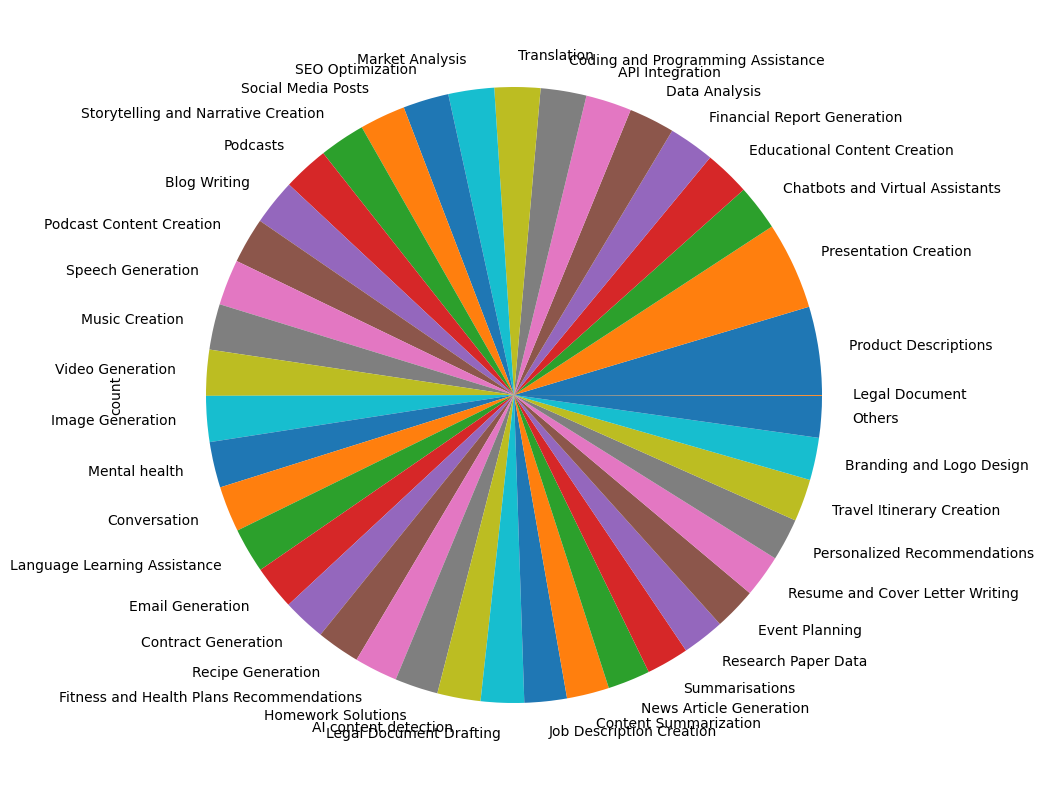

In [ ]:
df["Category"].value_counts().plot(kind='pie', figsize=(10,10))

In [ ]:
import transformers

In [ ]:
tokenizer = transformers.DistilBertTokenizer.from_pretrained("distilbert/distilbert-base-uncased", max_length=512)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
model = transformers.DistilBertForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased", num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
df = df.sample(frac=1.0, random_state=42)

In [ ]:
SIZE = df.shape[0]

# Calculate the indices for the 70:20:10 split
train_end = int(0.7 * SIZE)
val_end = int(0.9 * SIZE)

train_texts = list(df["Prompt"][:train_end])
val_texts = list(df["Prompt"][train_end:val_end])
test_texts = list(df["Prompt"][val_end:])

train_labels = list(df["Category"][:train_end])
val_labels = list(df["Category"][train_end:val_end])
test_labels = list(df["Category"][val_end:])

In [ ]:
len(train_texts)

1573

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [ ]:
from torch.utils.data import Dataset
import torch
from sklearn.preprocessing import LabelEncoder

class DataLoader(Dataset):
    """
    Custom Dataset class for handling tokenized text data and corresponding labels.
    Inherits from torch.utils.data.Dataset.
    """
    def __init__(self, encodings, labels):
        """
        Initializes the DataLoader class with encodings and labels.

        Args:
            encodings (dict): A dictionary containing tokenized input text data
                              (e.g., 'input_ids', 'token_type_ids', 'attention_mask').
            labels (list): A list of labels for the input text data.
        """
        self.encodings = encodings
        self.label_encoder = LabelEncoder()
        self.labels = self.label_encoder.fit_transform(labels)  # Transform labels to numerical values

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Ensure the label is an integer tensor
        return item

    def __len__(self):
        """
        Returns the number of data items in the dataset.

        Returns:
            (int): The number of data items in the dataset.
        """
        return len(self.labels)


In [ ]:
train_dataloader = DataLoader(train_encodings, train_labels)

val_dataloader = DataLoader(val_encodings, val_labels)

test_dataset = DataLoader(test_encodings, test_labels)

In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    """
    Computes accuracy, F1, precision, and recall for a given set of predictions.

    Args:
        pred (obj): An object containing label_ids and predictions attributes.
            - label_ids (array-like): A 1D array of true class labels.
            - predictions (array-like): A 2D array where each row represents
              an observation, and each column represents the probability of
              that observation belonging to a certain class.

    Returns:
        dict: A dictionary containing the following metrics:
            - Accuracy (float): The proportion of correctly classified instances.
            - F1 (float): The macro F1 score, which is the harmonic mean of precision
              and recall. Macro averaging calculates the metric independently for
              each class and then takes the average.
            - Precision (float): The macro precision, which is the number of true
              positives divided by the sum of true positives and false positives.
            - Recall (float): The macro recall, which is the number of true positives
              divided by the sum of true positives and false negatives.
    """
    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./TTC4900Model',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=50,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True,
    learning_rate=1e-5
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
     # training arguments that we defined above
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=val_dataloader,
    compute_metrics= compute_metrics
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,3.738900,3.715142,0.057778,0.020210,0.028151,0.046965


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyboardInterrupt: 

In [ ]:
q=[trainer.evaluate(eval_dataset=df) for df in [train_dataloader, val_dataloader, test_dataset]]

pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,1.643811,1.000000,1.000000,1.000000,1.00000
val,1.699861,0.990196,0.993725,0.994444,0.99375
test,2.615422,0.461538,0.400000,0.400000,0.40000


In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

In [ ]:
def predict(text):
    """
    Predicts the class label for a given input text

    Args:
        text (str): The input text for which the class label needs to be predicted.

    Returns:
        probs (torch.Tensor): Class probabilities for the input text.
        pred_label_idx (torch.Tensor): The index of the predicted class label.
        pred_label (str): The predicted class label.
    """
    # Tokenize the input text and move tensors to the GPU if available
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")

    # Get model output (logits)
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)
    """ Explanation outputs: The BERT model returns a tuple containing the output logits (and possibly other elements depending on the model configuration). In this case, the output logits are the first element in the tuple, which is why we access it using outputs[0].

    outputs[0]: This is a tensor containing the raw output logits for each class. The shape of the tensor is (batch_size, num_classes) where batch_size is the number of input samples (in this case, 1, as we are predicting for a single input text) and num_classes is the number of target classes.

    softmax(1): The softmax function is applied along dimension 1 (the class dimension) to convert the raw logits into class probabilities. Softmax normalizes the logits so that they sum to 1, making them interpretable as probabilities. """

    # Get the index of the class with the highest probability
    # argmax() finds the index of the maximum value in the tensor along a specified dimension.
    # By default, if no dimension is specified, it returns the index of the maximum value in the flattened tensor.
    pred_label_idx = probs.argmax()

    # Now map the predicted class index to the actual class label
    # Since pred_label_idx is a tensor containing a single value (the predicted class index),
    # the .item() method is used to extract the value as a scalar
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label

In [ ]:
text = "Write a hindi classical rock music "
predict(text)

(tensor([[0.0361, 0.0409, 0.0496, 0.0414, 0.0436, 0.0356, 0.0347, 0.0444, 0.0431,
          0.0366, 0.0466, 0.0412, 0.0561, 0.0416, 0.0383, 0.0434, 0.0470, 0.2146,
          0.0285, 0.0368]], device='cuda:0', grad_fn=<SoftmaxBackward0>),
 tensor(17, device='cuda:0'),
 'Data Analysis')